In [1]:
import pandas as ps
ds=ps.read_csv("project shets - Feedback_Details_new.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Purchase_ID  2500 non-null   int64  
 1   Weather      2325 non-null   object 
 2   Rating       2325 non-null   float64
 3   Feedback     2325 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 78.3+ KB


In [2]:
ds.head()

,Purchase_ID,Weather,Rating,Feedback
0,1,Cloudy,4.0,Poor
1,2,NaN,1.0,Average
2,3,Cloudy,2.0,Good
3,4,NaN,3.0,Bad
4,5,Sunny,4.0,Poor


In [3]:
ds.tail()

,Purchase_ID,Weather,Rating,Feedback
2495,2496,Rainy,4.0,Good
2496,2497,Rainy,NaN,Bad
2497,2498,Cloudy,5.0,Good
2498,2499,Rainy,2.0,Average
2499,2500,Sunny,3.0,Good


In [4]:
ds.describe()

,Purchase_ID,Rating
count,2500.00000,2325.00000
mean,1250.50000,3.00129
std,721.83216,1.40429
min,1.00000,1.00000
25%,625.75000,2.00000
50%,1250.50000,3.00000
75%,1875.25000,4.00000
max,2500.00000,5.00000


In [5]:
ds.shape

(2500, 4)

In [6]:
ds.columns

Index(['Purchase_ID', 'Weather', 'Rating', 'Feedback'], dtype='object')

In [7]:
ds.isnull().sum()

Purchase_ID      0
Weather        175
Rating         175
Feedback       175
dtype: int64

In [8]:
columns=['Weather', 'Rating', 'Feedback']

In [9]:
for col in columns:
    if ds[col].dtypes.kind in 'ifc':
        ds[col]=ds[col].fillna(ds[col].median())
    else:
        ds[col]=ds[col].fillna(ds[col].mode()[0])
    

In [10]:
ds.isnull().sum()

Purchase_ID    0
Weather        0
Rating         0
Feedback       0
dtype: int64

In [11]:
import matplotlib.pyplot as py
import seaborn as sbn

In [12]:
new_col=ds.select_dtypes(include="number").columns

Text(0.5, 1.0, 'Rating')

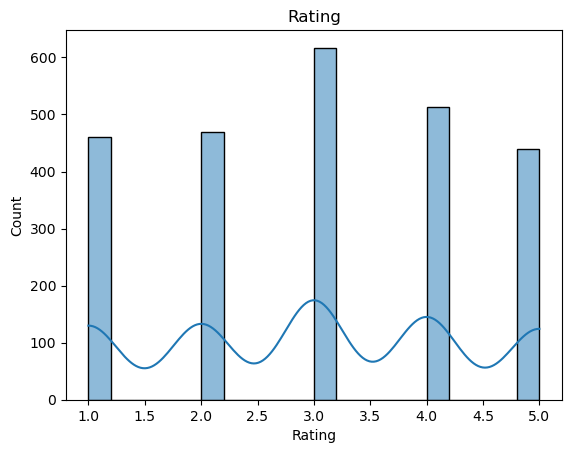

In [13]:
sbn.histplot(ds["Rating"],bins=20,kde=True)
py.title("Rating")

In [14]:
import scipy.stats as z_score
z_score=ds["Rating"]

In [15]:
outliers=(z_score < -3) | (z_score > 3)

In [16]:
total_outliers=outliers.sum()

In [17]:
print(total_outliers)

953


In [18]:
num_col=["Rating"]
original_stats={}

In [19]:
for col in num_col:
    mean_val=ds[col].mean()
    ds[col]=ds[col].fillna(mean_val)
    std_val=ds[col].std()
    original_stats[col]=(mean_val,std_val)
    ds[col]=ds[col].clip(lower = mean_val -3 * std_val,upper = mean_val + 3 * std_val)
    print(f"clipped value in {col}")

clipped value in Rating


In [20]:
for col in num_col:
    mean_val,std_val=original_stats[col]
    lower_bound=mean_val-3*std_val
    upper_bound=mean_val+3*std_val
    outliers_remaining=ds[(ds[col] > upper_bound)|(ds[col] < lower_bound)].shape[0]
    if outliers_remaining==0:
        print(f"remaining value {outliers_remaining} in {col}")
    else:
        print("Outliers is there")    

remaining value 0 in Rating


In [21]:
ds.to_csv("Pro_Feedback_details(C).csv",index=False)

In [22]:
dcs=ps.read_csv("Pro_Feedback_details(C).csv")
